In [3]:
!pip install snscrape

In [4]:
! pip install celluloid

In [5]:
!pip install afinn

In [6]:
!pip install wordcloud

In [7]:
import snscrape.modules.twitter as scpt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
from celluloid import Camera
from afinn import Afinn

pd.set_option("display.max_colwidth", -1)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_9120/3330702222.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


# scraper les données 

In [8]:
def pretty(d, indent=0):
    for key, value in d.items():
      print('\t' * indent + str(key))
      if isinstance(value, dict):
         pretty(value, indent+1)
      else:
         print('\t' * (indent+1) + str(value))

In [9]:
# query ="(#Ukraine) since:2022-02-24"

# tweets = []
# limits =10000
# limit_add=50

# for tweet in scpt.TwitterSearchScraper(query).get_items():

#     print(vars(tweet)) 
#     if len(tweets)==limits :
#         break
#     if len(tweets)==limit_add :
#         df = pd.DataFrame(tweets, columns = ['Date','Username','displayname','UserDescription','followersCount','friendsCount','statusesCount','favouritesCount',
#                                         'listedCount','mediaCount','location','content','replyCount','retweetCount','likeCount','quoteCount','lang','hashtags'])
#         df.to_csv('sentiments_uk.csv', mode='a', header=False)
#         tweets = []
#     else:
#         tweets.append([tweet.date, tweet.user.username,tweet.user.displayname,tweet.user.description,tweet.user.followersCount,tweet.user.friendsCount,
#                     tweet.user.statusesCount,tweet.user.favouritesCount,tweet.user.listedCount,tweet.user.mediaCount,tweet.user.location,tweet.content,
#                     tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.lang,tweet.hashtags])
    


### Methode 2 Scraping

In [10]:
#snscrape --jsonl --progress --max-results 1000000 --since 2021-01-01 twitter-search "(#Ukraine) since:2022-02-24" > tweets_uk.json

# Mise en forme des données

In [11]:
df=pd.read_json("tweets_uk.json",lines=True)

In [12]:
username=[]
displayname=[]
description=[]
created=[]
location=[]
mediaCount=[]
listedCount=[]
favouritesCount=[]
statusesCount=[]
friendsCount=[]
followersCount=[]

for user in df.user:
    
    username.append(user['username'])
    displayname.append(user['displayname'])
    description.append(user['description'])
    created.append(user['created'])
    location.append(user['location'])
    mediaCount.append(user['mediaCount'])
    listedCount.append(user['listedCount'])
    favouritesCount.append(user['favouritesCount'])
    statusesCount.append(user['statusesCount'])
    friendsCount.append(user['friendsCount'])
    followersCount.append(user['followersCount'])
df['username']=username
df['displayname']=displayname
df['description']=description
df['created']=created
df['mediaCount']=mediaCount
df['listedCount']=listedCount
df['favouritesCount']=favouritesCount
df['statusesCount']=statusesCount
df['friendsCount']=friendsCount
df['followersCount']=followersCount
df['location']=location

df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,displayname,description,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location
0,snscrape.modules.twitter.Tweet,https://twitter.com/MagyarIgazsag/status/1526196373867069440,2022-05-16 13:42:25+00:00,A volt nevadai igazságügyi miniszter szerint nem jó ötlet 44 milliárd dollárt küldeni Ukrajnának.\n.\n.\n#magyarigazság #ukrajna #oroszukránháború #amerika #ukraine #UkraineRussiaWar #news #new #híroldal #hírek #hír #Tweet #Twitter https://t.co/bGvI1a1eNH,A volt nevadai igazságügyi miniszter szerint nem jó ötlet 44 milliárd dollárt küldeni Ukrajnának.\n.\n.\n#magyarigazság #ukrajna #oroszukránháború #amerika #ukraine #UkraineRussiaWar #news #new #híroldal #hírek #hír #Tweet #Twitter https://t.co/bGvI1a1eNH,1526196373867069440,"{'_type': 'snscrape.modules.twitter.User', 'username': 'MagyarIgazsag', 'id': 1520424478538407937, 'displayname': 'Magyar Igazság', 'description': 'A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal. instagram.com/magyarigazsag', 'rawDescription': 'A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal. https://t.co/u1PMPop0m5', 'descriptionUrls': [{'text': 'instagram.com/magyarigazsag', 'url': 'https://www.instagram.com/magyarigazsag', 'tcourl': 'https://t.co/u1PMPop0m5', 'indices': [80, 103]}], 'verified': False, 'created': '2022-04-30T15:27:16+00:00', 'followersCount': 11, 'friendsCount': 12, 'statusesCount': 73, 'favouritesCount': 32, 'listedCount': 0, 'mediaCount': 73, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1520424690447228928/tzuuegmW_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1520424478538407937/1652373626', 'label': None, 'url': 'https://twitter.com/MagyarIgazsag'}",0,0,0,...,Magyar Igazság,A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal.\n\ninstagram.com/magyarigazsag,2022-04-30T15:27:16+00:00,73,0,32,73,12,11,
1,snscrape.modules.twitter.Tweet,https://twitter.com/lilja1972/status/1526196365126160384,2022-05-16 13:42:23+00:00,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,1526196365126160384,"{'_type': 'snscrape.modules.twitter.User', 'username': 'lilja1972', 'id': 1685870023, 'displayname': '𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir', 'description': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'rawDescription': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'descriptionUrls': None, 'verified': False, 'created': '2013-08-20T13:47:54+00:00', 'followersCount': 5900, 'friendsCount': 4125, 'statusesCount': 11493, 'favouritesCount': 26423, 'listedCount': 60, 'mediaCount': 1523, 'location': 'Reykjavík', 'protected': False, 'linkUrl': 'http://www.liljawriter.com', 'linkTcourl': 'https://t.co/KvDeWtOeXm', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1134070185734955008/x_kakvLU_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1685870023/1636398199', 'label': None, 'url': 'https://twitter.com/lilja1972'}",0,0,0,...,𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir,"Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.",2013-0

In [13]:
# verification de valeurs manquantes
df.isna().sum().sort_values(ascending=False)

retweetedTweet      100000
cashtags            99831 
place               97333 
coordinates         97331 
inReplyToUser       85240 
inReplyToTweetId    85240 
quotedTweet         84253 
mentionedUsers      74916 
media               70255 
outlinks            56842 
tcooutlinks         56842 
hashtags            1     
listedCount         0     
mediaCount          0     
created             0     
description         0     
displayname         0     
favouritesCount     0     
statusesCount       0     
friendsCount        0     
followersCount      0     
username            0     
_type               0     
url                 0     
sourceLabel         0     
sourceUrl           0     
source              0     
lang                0     
conversationId      0     
quoteCount          0     
likeCount           0     
retweetCount        0     
replyCount          0     
user                0     
id                  0     
renderedContent     0     
content             0     
d

In [14]:
df.drop(columns=['tcooutlinks',  'outlinks', 'media', 'mentionedUsers', 'quotedTweet', 'inReplyToTweetId', 
                 'inReplyToUser', 'coordinates', 'place', 'cashtags', 'retweetedTweet'])

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,displayname,description,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location
0,snscrape.modules.twitter.Tweet,https://twitter.com/MagyarIgazsag/status/1526196373867069440,2022-05-16 13:42:25+00:00,A volt nevadai igazságügyi miniszter szerint nem jó ötlet 44 milliárd dollárt küldeni Ukrajnának.\n.\n.\n#magyarigazság #ukrajna #oroszukránháború #amerika #ukraine #UkraineRussiaWar #news #new #híroldal #hírek #hír #Tweet #Twitter https://t.co/bGvI1a1eNH,A volt nevadai igazságügyi miniszter szerint nem jó ötlet 44 milliárd dollárt küldeni Ukrajnának.\n.\n.\n#magyarigazság #ukrajna #oroszukránháború #amerika #ukraine #UkraineRussiaWar #news #new #híroldal #hírek #hír #Tweet #Twitter https://t.co/bGvI1a1eNH,1526196373867069440,"{'_type': 'snscrape.modules.twitter.User', 'username': 'MagyarIgazsag', 'id': 1520424478538407937, 'displayname': 'Magyar Igazság', 'description': 'A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal. instagram.com/magyarigazsag', 'rawDescription': 'A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal. https://t.co/u1PMPop0m5', 'descriptionUrls': [{'text': 'instagram.com/magyarigazsag', 'url': 'https://www.instagram.com/magyarigazsag', 'tcourl': 'https://t.co/u1PMPop0m5', 'indices': [80, 103]}], 'verified': False, 'created': '2022-04-30T15:27:16+00:00', 'followersCount': 11, 'friendsCount': 12, 'statusesCount': 73, 'favouritesCount': 32, 'listedCount': 0, 'mediaCount': 73, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1520424690447228928/tzuuegmW_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1520424478538407937/1652373626', 'label': None, 'url': 'https://twitter.com/MagyarIgazsag'}",0,0,0,...,Magyar Igazság,A Magyar Igazság az Instagramon és a Twitter platformon megtalálható híroldal.\n\ninstagram.com/magyarigazsag,2022-04-30T15:27:16+00:00,73,0,32,73,12,11,
1,snscrape.modules.twitter.Tweet,https://twitter.com/lilja1972/status/1526196365126160384,2022-05-16 13:42:23+00:00,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,1526196365126160384,"{'_type': 'snscrape.modules.twitter.User', 'username': 'lilja1972', 'id': 1685870023, 'displayname': '𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir', 'description': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'rawDescription': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'descriptionUrls': None, 'verified': False, 'created': '2013-08-20T13:47:54+00:00', 'followersCount': 5900, 'friendsCount': 4125, 'statusesCount': 11493, 'favouritesCount': 26423, 'listedCount': 60, 'mediaCount': 1523, 'location': 'Reykjavík', 'protected': False, 'linkUrl': 'http://www.liljawriter.com', 'linkTcourl': 'https://t.co/KvDeWtOeXm', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1134070185734955008/x_kakvLU_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1685870023/1636398199', 'label': None, 'url': 'https://twitter.com/lilja1972'}",0,0,0,...,𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir,"Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.",2013-0

In [15]:
df.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'username', 'displayname',
       'description', 'created', 'mediaCount', 'listedCount',
       'favouritesCount', 'statusesCount', 'friendsCount', 'followersCount',
       'location'],
      dtype='object')

# langue la plus populaire des tweets

<AxesSubplot:>

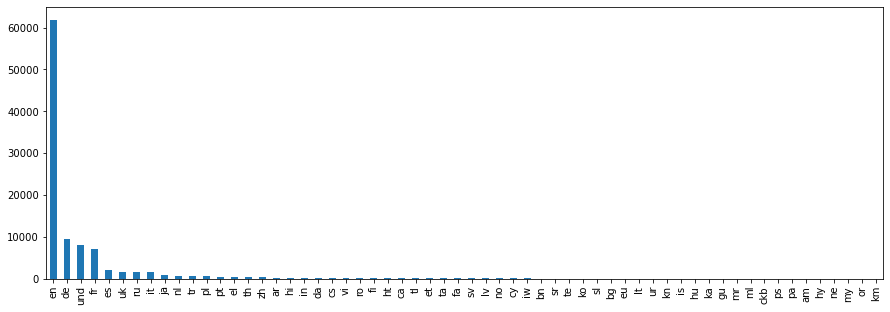

In [16]:
plt.figure(figsize=(15,5))
df['lang'].value_counts().plot.bar()

In [17]:
# analyse des tweets en anglais
df_en = df[df.lang == 'en'].drop('lang', axis=1)

# Localisation des utilisateurs

<AxesSubplot:>

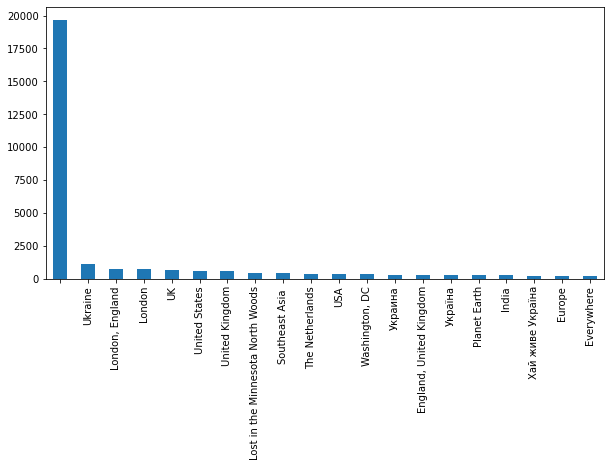

In [18]:
plt.figure(figsize=(10,5))
df_en['location'].value_counts().iloc[:20].plot.bar()

# Analyse des sentiments 

In [19]:
afinn = Afinn()
aff=[]
for sentence in df_en['content']:
    vs=afinn.score(sentence)
    aff.append(vs)
df_en['sentiment']=aff

In [20]:
# creation de la colonne label (positif , neutre ou negatif)
THRESHOLD = 0.2
conditions = [
    (df_en['sentiment'] <= -THRESHOLD), 
    (df_en['sentiment'] > -THRESHOLD) & (df_en['sentiment'] < THRESHOLD),
    (df_en['sentiment'] >= THRESHOLD)
]

values = ["neg","neu", "pos"]
df_en['label'] = np.select(conditions, values)

df_en.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
1,snscrape.modules.twitter.Tweet,https://twitter.com/lilja1972/status/1526196365126160384,2022-05-16 13:42:23+00:00,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,Despite not scoring high in the #Eurovision finals I am very happy with the #iceland contestants #Systur. Vocal supporters of #Ukraine and #TransRights those lovely siblings have made us proud. And the song reminds us that “spring will warm your wings again.” https://t.co/7TcxyPdBzf,1526196365126160384,"{'_type': 'snscrape.modules.twitter.User', 'username': 'lilja1972', 'id': 1685870023, 'displayname': '𝕃𝕚𝕝𝕛𝕒 Sigurðardóttir', 'description': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'rawDescription': 'Award winning Icelandic writer for page, stage and screen. New thriller: COLD AS HELL - out now. TV series KATLA - streaming on Netflix.', 'descriptionUrls': None, 'verified': False, 'created': '2013-08-20T13:47:54+00:00', 'followersCount': 5900, 'friendsCount': 4125, 'statusesCount': 11493, 'favouritesCount': 26423, 'listedCount': 60, 'mediaCount': 1523, 'location': 'Reykjavík', 'protected': False, 'linkUrl': 'http://www.liljawriter.com', 'linkTcourl': 'https://t.co/KvDeWtOeXm', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1134070185734955008/x_kakvLU_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1685870023/1636398199', 'label': None, 'url': 'https://twitter.com/lilja1972'}",0,0,0,...,2013-08-20T13:47:54+00:00,1523,60,26423,11493,4125,5900,Reykjavík,10.0,pos
3,snscrape.modules.twitter.Tweet,https://twitter.com/PILPG/status/1526196345123614720,2022-05-16 13:42:18+00:00,New speakers just announced: Join PILPG's Professor Jennifer Trahan and Ambassador Todd Buchwald this Friday for our expert roundtable on the war in #Ukraine and the role of the #UnitedNations. Learn more and register below. https://t.co/q6uJidSlYK https://t.co/r4t7b7Ix1N,New speakers just announced: Join PILPG's Professor Jennifer Trahan and Ambassador Todd Buchwald this Friday for our expert roundtable on the war in #Ukraine and the role of the #UnitedNations. Learn more and register below. twitter.com/PILPG/status/1… https://t.co/r4t7b7Ix1N,1526196345123614720,"{'_type': 'snscrape.modules.twitter.User', 'username': 'PILPG', 'id': 361360464, 'displayname': 'Public International Law & Policy Group (PILPG)', 'description': 'Public International Law & Policy Group, a global pro bono law firm specializing in peace negotiations, post-conflict constitutions, and transitional justice.', 'rawDescription': 'Public International Law & Policy Group, a global pro bono law firm specializing in peace negotiations, post-conflict constitutions, and transitional justice.', 'descriptionUrls': None, 'verified': True, 'created': '2011-08-24T17:29:56+00:00', 'followersCount': 7917, 'friendsCount': 1135, 'statusesCount': 12521, 'favouritesCount': 2370, 'listedCount': 152, 'mediaCount': 1581, 'location': '', 'protected': False, 'linkUrl': 'http://www.pilpg.org', 'linkTcourl': 'https://t.co/Zxhp9xKlE4', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/646143284583206912/AS_zR_zt_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/361360464/1607456964', 'label': None, 'url': 'https://twitter.com/PILPG'}",0,0,0,...,2011-08-24T17:29:56+00:00,1581,152,2370,12521,1135,7917,,-1.0,neg
4,snscrape.modules.twitter.Tweet,https://twitter.com/ToriDi/status/1526196307542560768,2022-05-16 13:42:09+00:00,So #JoeBiden didn’t want #Ukraine to have money wh

In [21]:
# sauvegarde des données 
# df_en.to_csv('sentiments_Uk.csv')

In [22]:
# df_en=pd.read_csv("sentiments_Uk.csv")

In [23]:
# df_en=df_en[100000:]
# df_en

<AxesSubplot:xlabel='label', ylabel='Count'>

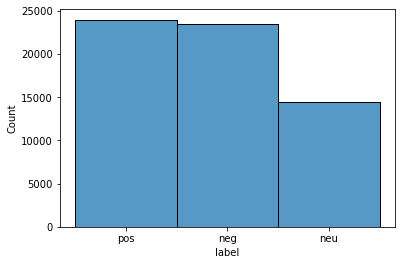

In [24]:
# diagrame en bar des types d'avis
sns.histplot(df_en["label"])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

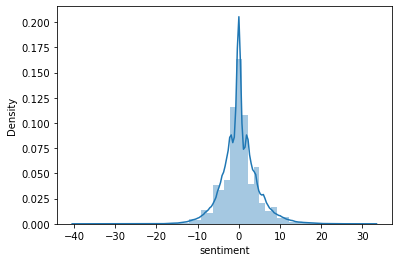

In [25]:
# distribution des sentiments 
sns.distplot(df_en['sentiment'])

# moyenne des sentiment de la population mondial

In [26]:
df_en.sentiment.mean()

0.21889348768026903

# tweet le plus retweeté 

In [27]:
sorted_tweets = df_en.sort_values(by = 'retweetCount', ascending=False)
most_retweeted = sorted_tweets.iloc[0]
phrase=df.content[(df['date']==most_retweeted['date']) & (df['username']==most_retweeted['username'])]
phrase = " ".join(phrase)
print('*'+'-'*30+'Tweet'+'-'*30+'*')
print(phrase)
print('*'+'-'*30+'Details du Tweet'+'-'*30+'*')
print(most_retweeted)

*------------------------------Tweet------------------------------*
“Mr. President, we reached Ukraine’s state border with the enemy state.  Mr. President, we made it!”

Glory to #Ukraine! Glory to Heroes!

#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar

 https://t.co/kdD6kD1w3x
*------------------------------Details du Tweet------------------------------*
_type               snscrape.modules.twitter.Tweet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

# top 10 Tweet Retweeté 

<AxesSubplot:xlabel='username'>

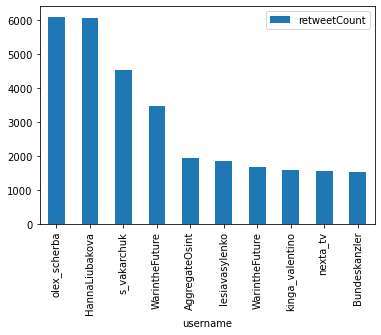

In [28]:
sorted_tweets.head(10).plot.bar(y='retweetCount',x='username')

In [29]:
sorted_tweets.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
11381,snscrape.modules.twitter.Tweet,https://twitter.com/olex_scherba/status/1525967632524091394,2022-05-15 22:33:29+00:00,"“Mr. President, we reached Ukraine’s state border with the enemy state. Mr. President, we made it!”\n\nGlory to #Ukraine! Glory to Heroes!\n\n#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar\n\n https://t.co/kdD6kD1w3x","“Mr. President, we reached Ukraine’s state border with the enemy state. Mr. President, we made it!”\n\nGlory to #Ukraine! Glory to Heroes!\n\n#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar\n\n https://t.co/kdD6kD1w3x",1525967632524091394,"{'_type': 'snscrape.modules.twitter.User', 'username': 'olex_scherba', 'id': 163018653, 'displayname': 'olexander scherba🇺🇦', 'description': '26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.', 'rawDescription': '26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.', 'descriptionUrls': None, 'verified': True, 'created': '2010-07-05T09:44:27+00:00', 'followersCount': 273821, 'friendsCount': 980, 'statusesCount': 28397, 'favouritesCount': 15074, 'listedCount': 3984, 'mediaCount': 4704, 'location': 'Kyiv', 'protected': False, 'linkUrl': 'https://www.amazon.com/Ukraine-vs-Darkness-Undiplomatic-Ukrainian-ebook/dp/B08WKF3B2K', 'linkTcourl': 'https://t.co/ERA9Ntt061', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/671642770549956608/yR9Is6BD_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/163018653/1646220178', 'label': None, 'url': 'https://twitter.com/olex_scherba'}",851,6108,37482,...,2010-07-05T09:44:27+00:00,4704,3984,15074,28397,980,273821,Kyiv,5.0,pos
25808,snscrape.modules.twitter.Tweet,https://twitter.com/HannaLiubakova/status/1525755313412001792,2022-05-15 08:29:48+00:00,"Kalush Orchestra showed a video for the song Stefania, shot in Bucha, Irpin, Hostomel and Borodyanka, destroyed by the Russian army. They didn't want to publish it before #Eurovision not to get accused of politicizing the contest. The video ends with a call: Stand with #Ukraine! https://t.co/W5lm3gmqMD","Kalush Orchestra showed a video for the song Stefania, shot in Bucha, Irpin, Hostomel and Borodyanka, destroyed by the Russian army. They didn't want to publish it before #Eurovision not to get accused of politicizing the contest. The video ends with a call: Stand with #Ukraine! https://t.co/W5lm3gmqMD",1525755313412001792,"{'_type': 'snscrape.modules.twitter.User', 'username': 'HannaLiubakova', 'id': 720139699, 'displayname': 'Hanna Liubakova', 'description': 'Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal', 'rawDescription': 'Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal', 'descriptionUrls': None, 'verified': False, 'created': '2012-07-27T13:16:55+00:00', 'followersCount': 140138, 'friendsCount': 1419, 'statusesCount': 18388, 'favouritesCount': 3658, 'listedCount': 2489, 'mediaCount': 5592, 'location': 'Moving around', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1512025854800502788/A_KNnJw5_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/720139699/1607206467', 'label': None, 'url': 'https://twitter.com/HannaLiubakova'}",258,6057,17448,...,2012-07-27T13:16:55+00:00,5592,2489,3658,18388,1419,140138,Moving around,-4.0,neg
73852,snscrape.modules.twitter.Tweet,https://twitter.com/s_vakarchuk/status/1525165356318433282,2022-05-13 17:25:31+00:00,It is pro

# tweet les plus cités par les utilisateurs (quotecount)

In [30]:
sorted_tweets_quote = df_en.sort_values(by = 'quoteCount', ascending=False)

<AxesSubplot:xlabel='username'>

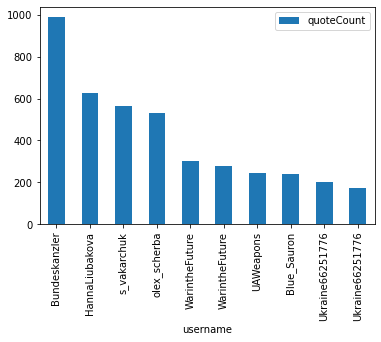

In [31]:
sorted_tweets_quote.head(10).plot.bar(y='quoteCount',x='username')

In [32]:
sorted_tweets_quote.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
80777,snscrape.modules.twitter.Tweet,https://twitter.com/Bundeskanzler/status/1525079306514440194,2022-05-13 11:43:35+00:00,Three points from my long phone call with #Putin today: \nThere must be a ceasefire in #Ukraine as quickly as possible. \nThe claim that Nazis are in power there is false. \nAnd I also reminded him about Russia’s responsibility for the global food situation.,Three points from my long phone call with #Putin today: \nThere must be a ceasefire in #Ukraine as quickly as possible. \nThe claim that Nazis are in power there is false. \nAnd I also reminded him about Russia’s responsibility for the global food situation.,1525079306514440194,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Bundeskanzler', 'id': 1489164711652466688, 'displayname': 'Bundeskanzler Olaf Scholz', 'description': 'Bundeskanzler der Bundesrepublik Deutschland / Federal Chancellor of the Federal Republic of Germany', 'rawDescription': 'Bundeskanzler der Bundesrepublik Deutschland / Federal Chancellor of the Federal Republic of Germany', 'descriptionUrls': None, 'verified': True, 'created': '2022-02-03T09:12:06+00:00', 'followersCount': 465585, 'friendsCount': 93, 'statusesCount': 167, 'favouritesCount': 22, 'listedCount': 1148, 'mediaCount': 38, 'location': '', 'protected': False, 'linkUrl': 'http://www.bundeskanzler.de', 'linkTcourl': 'https://t.co/vXnIPqhhwe', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1494251948782067714/8rYsP-Td_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1489164711652466688/1644759943', 'label': {'_type': 'snscrape.modules.twitter.UserLabel', 'description': 'Regierungsvertreter*in aus Deutschland', 'url': 'https://help.twitter.com/rules-and-policies/state-affiliated', 'badgeUrl': 'https://pbs.twimg.com/semantic_core_img/1290392753013002240/mWq1iE5L?format=png&name=orig', 'longDescription': None}, 'url': 'https://twitter.com/Bundeskanzler'}",5289,1536,8895,...,2022-02-03T09:12:06+00:00,38,1148,22,167,93,465585,,0.0,neu
25808,snscrape.modules.twitter.Tweet,https://twitter.com/HannaLiubakova/status/1525755313412001792,2022-05-15 08:29:48+00:00,"Kalush Orchestra showed a video for the song Stefania, shot in Bucha, Irpin, Hostomel and Borodyanka, destroyed by the Russian army. They didn't want to publish it before #Eurovision not to get accused of politicizing the contest. The video ends with a call: Stand with #Ukraine! https://t.co/W5lm3gmqMD","Kalush Orchestra showed a video for the song Stefania, shot in Bucha, Irpin, Hostomel and Borodyanka, destroyed by the Russian army. They didn't want to publish it before #Eurovision not to get accused of politicizing the contest. The video ends with a call: Stand with #Ukraine! https://t.co/W5lm3gmqMD",1525755313412001792,"{'_type': 'snscrape.modules.twitter.User', 'username': 'HannaLiubakova', 'id': 720139699, 'displayname': 'Hanna Liubakova', 'description': 'Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal', 'rawDescription': 'Journalist from Minsk, Belarus. Non-resident fellow @AtlanticCouncil. Media trainer. Formerly @RFERL, @Belsat_TV. 2019 @worldpressinst fellow. DM for Signal', 'descriptionUrls': None, 'verified': False, 'created': '2012-07-27T13:16:55+00:00', 'followersCount': 140138, 'friendsCount': 1419, 'statusesCount': 18388, 'favouritesCount': 3658, 'listedCount': 2489, 'mediaCount': 5592, 'location': 'Moving around', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1512025854800502788/A_KNnJw5_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/720139699/1607206467', 'label': None, 'url': 'https://twitter.com/HannaLiubakova'}",258,6

# tweets les plus commentés 

In [33]:
sorted_tweets_reply = df_en.sort_values(by = 'replyCount', ascending=False)

<AxesSubplot:xlabel='username'>

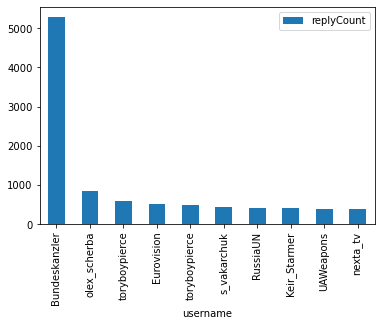

In [34]:
sorted_tweets_reply.head(10).plot.bar(y='replyCount',x='username')

In [35]:
sorted_tweets_reply.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
80777,snscrape.modules.twitter.Tweet,https://twitter.com/Bundeskanzler/status/1525079306514440194,2022-05-13 11:43:35+00:00,Three points from my long phone call with #Putin today: \nThere must be a ceasefire in #Ukraine as quickly as possible. \nThe claim that Nazis are in power there is false. \nAnd I also reminded him about Russia’s responsibility for the global food situation.,Three points from my long phone call with #Putin today: \nThere must be a ceasefire in #Ukraine as quickly as possible. \nThe claim that Nazis are in power there is false. \nAnd I also reminded him about Russia’s responsibility for the global food situation.,1525079306514440194,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Bundeskanzler', 'id': 1489164711652466688, 'displayname': 'Bundeskanzler Olaf Scholz', 'description': 'Bundeskanzler der Bundesrepublik Deutschland / Federal Chancellor of the Federal Republic of Germany', 'rawDescription': 'Bundeskanzler der Bundesrepublik Deutschland / Federal Chancellor of the Federal Republic of Germany', 'descriptionUrls': None, 'verified': True, 'created': '2022-02-03T09:12:06+00:00', 'followersCount': 465585, 'friendsCount': 93, 'statusesCount': 167, 'favouritesCount': 22, 'listedCount': 1148, 'mediaCount': 38, 'location': '', 'protected': False, 'linkUrl': 'http://www.bundeskanzler.de', 'linkTcourl': 'https://t.co/vXnIPqhhwe', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1494251948782067714/8rYsP-Td_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1489164711652466688/1644759943', 'label': {'_type': 'snscrape.modules.twitter.UserLabel', 'description': 'Regierungsvertreter*in aus Deutschland', 'url': 'https://help.twitter.com/rules-and-policies/state-affiliated', 'badgeUrl': 'https://pbs.twimg.com/semantic_core_img/1290392753013002240/mWq1iE5L?format=png&name=orig', 'longDescription': None}, 'url': 'https://twitter.com/Bundeskanzler'}",5289,1536,8895,...,2022-02-03T09:12:06+00:00,38,1148,22,167,93,465585,,0.0,neu
11381,snscrape.modules.twitter.Tweet,https://twitter.com/olex_scherba/status/1525967632524091394,2022-05-15 22:33:29+00:00,"“Mr. President, we reached Ukraine’s state border with the enemy state. Mr. President, we made it!”\n\nGlory to #Ukraine! Glory to Heroes!\n\n#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar\n\n https://t.co/kdD6kD1w3x","“Mr. President, we reached Ukraine’s state border with the enemy state. Mr. President, we made it!”\n\nGlory to #Ukraine! Glory to Heroes!\n\n#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar\n\n https://t.co/kdD6kD1w3x",1525967632524091394,"{'_type': 'snscrape.modules.twitter.User', 'username': 'olex_scherba', 'id': 163018653, 'displayname': 'olexander scherba🇺🇦', 'description': '26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.', 'rawDescription': '26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.', 'descriptionUrls': None, 'verified': True, 'created': '2010-07-05T09:44:27+00:00', 'followersCount': 273821, 'friendsCount': 980, 'statusesCount': 28397, 'favouritesCount': 15074, 'listedCount': 3984, 'mediaCount': 4704, 'location': 'Kyiv', 'protected': False, 'linkUrl': 'https://www.amazon.com/Ukraine-vs-Darkness-Undiplomatic-Ukrainian-ebook/dp/B08WKF3B2K', 'linkTcourl': 'https://t.co/ERA9Ntt061', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/671642770549956608/yR9Is6BD_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/163018653/1646220178', 'label': None, 'url': 'https://twitter.com/olex_scherba'}",851,6108,37482,...,2010-07-05T09:44:27+00:00,4704,3984,15074,28397,980,273821,Kyiv,5.0,pos
45935,s

# compte le plus liké

In [36]:
sorted_tweets_like = df_en.sort_values(by = 'likeCount', ascending=False)

<AxesSubplot:xlabel='username'>

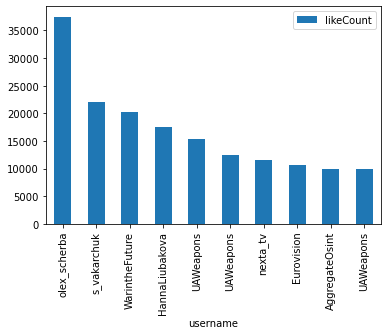

In [37]:
sorted_tweets_like.head(10).plot.bar(y='likeCount',x='username')

In [38]:
sorted_tweets_like.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
11381,snscrape.modules.twitter.Tweet,https://twitter.com/olex_scherba/status/1525967632524091394,2022-05-15 22:33:29+00:00,"“Mr. President, we reached Ukraine’s state border with the enemy state. Mr. President, we made it!”\n\nGlory to #Ukraine! Glory to Heroes!\n\n#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar\n\n https://t.co/kdD6kD1w3x","“Mr. President, we reached Ukraine’s state border with the enemy state. Mr. President, we made it!”\n\nGlory to #Ukraine! Glory to Heroes!\n\n#StandWithUkraine️ #UkraineWillWin #RussiaUkraineWar\n\n https://t.co/kdD6kD1w3x",1525967632524091394,"{'_type': 'snscrape.modules.twitter.User', 'username': 'olex_scherba', 'id': 163018653, 'displayname': 'olexander scherba🇺🇦', 'description': '26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.', 'rawDescription': '26 years in 🇺🇦 diplomatic service. Ukraine’s Ambassador to Austria (2014-2021). Author of “Undiplomatic Thoughts” (2021). Currently NAK Naftogaz.', 'descriptionUrls': None, 'verified': True, 'created': '2010-07-05T09:44:27+00:00', 'followersCount': 273821, 'friendsCount': 980, 'statusesCount': 28397, 'favouritesCount': 15074, 'listedCount': 3984, 'mediaCount': 4704, 'location': 'Kyiv', 'protected': False, 'linkUrl': 'https://www.amazon.com/Ukraine-vs-Darkness-Undiplomatic-Ukrainian-ebook/dp/B08WKF3B2K', 'linkTcourl': 'https://t.co/ERA9Ntt061', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/671642770549956608/yR9Is6BD_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/163018653/1646220178', 'label': None, 'url': 'https://twitter.com/olex_scherba'}",851,6108,37482,...,2010-07-05T09:44:27+00:00,4704,3984,15074,28397,980,273821,Kyiv,5.0,pos
73852,snscrape.modules.twitter.Tweet,https://twitter.com/s_vakarchuk/status/1525165356318433282,2022-05-13 17:25:31+00:00,It is probably the first in history music performance at Chornobyl power station! \nIncredible workers - brave and dedicated to their job. \nEverything is gonna be alright! #Ukraine 🇺🇦 https://t.co/XLeHPDwrJY,It is probably the first in history music performance at Chornobyl power station! \nIncredible workers - brave and dedicated to their job. \nEverything is gonna be alright! #Ukraine 🇺🇦 https://t.co/XLeHPDwrJY,1525165356318433282,"{'_type': 'snscrape.modules.twitter.User', 'username': 's_vakarchuk', 'id': 81828490, 'displayname': 'Sviatoslav Vakarchuk', 'description': 'musician, social activist 🇺🇦', 'rawDescription': 'musician, social activist 🇺🇦', 'descriptionUrls': None, 'verified': True, 'created': '2009-10-12T12:19:35+00:00', 'followersCount': 1795179, 'friendsCount': 12, 'statusesCount': 5776, 'favouritesCount': 3, 'listedCount': 2466, 'mediaCount': 490, 'location': 'Kyiv, UKRAINE', 'protected': False, 'linkUrl': 'https://www.facebook.com/sviatoslav.vakarchuk/', 'linkTcourl': 'https://t.co/Edt96AGYCR', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1486307855309410306/Pva3Bw_I_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/81828490/1647761724', 'label': None, 'url': 'https://twitter.com/s_vakarchuk'}",438,4547,22044,...,2009-10-12T12:19:35+00:00,490,2466,3,5776,12,1795179,"Kyiv, UKRAINE",4.0,pos
30410,snscrape.modules.twitter.Tweet,https://twitter.com/WarintheFuture/status/1525677618053324802,2022-05-15 03:21:04+00:00,"The battle of Kharkiv has been won by #Ukraine, with Russian forces withdrawing to the north &amp; east. Today, analysis on what is next for Ukraine’s military as it exploits a faltering Russian eastern offensive. 1/25 https://t.co/CRX3jDhBhA","The battle of Kharkiv has been won by #Ukraine, with Russian forces withdrawing to the north &amp; east. Today, analysis on what is next for Ukraine’s military as 

# compte le plus suivi

In [39]:
sorted_tweets_followers = df_en.sort_values(by = 'followersCount', ascending=False)

<AxesSubplot:xlabel='username'>

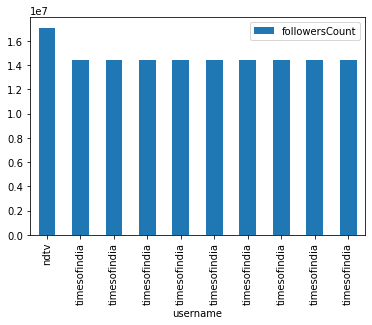

In [40]:
sorted_tweets_followers.head(10).plot.bar(y='followersCount',x='username')

In [41]:
sorted_tweets_followers

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
9183,snscrape.modules.twitter.Tweet,https://twitter.com/ndtv/status/1526042375256170497,2022-05-16 03:30:29+00:00,#Ukraine's Kalush Orchestra wins #Eurovision2022 song contest https://t.co/obCU79Bwpi,#Ukraine's Kalush Orchestra wins #Eurovision2022 song contest https://t.co/obCU79Bwpi,1526042375256170497,"{'_type': 'snscrape.modules.twitter.User', 'username': 'ndtv', 'id': 37034483, 'displayname': 'NDTV', 'description': 'Breaking news alerts from India. Instagram: instagram.com/ndtv YouTube: youtube.com/ndtv', 'rawDescription': 'Breaking news alerts from India. Instagram: https://t.co/QrV2OUzOYo YouTube: https://t.co/INzHBLFd1l', 'descriptionUrls': [{'text': 'instagram.com/ndtv', 'url': 'http://instagram.com/ndtv', 'tcourl': 'https://t.co/QrV2OUzOYo', 'indices': [45, 68]}, {'text': 'youtube.com/ndtv', 'url': 'http://youtube.com/ndtv', 'tcourl': 'https://t.co/INzHBLFd1l', 'indices': [78, 101]}], 'verified': True, 'created': '2009-05-01T20:34:48+00:00', 'followersCount': 17077048, 'friendsCount': 14, 'statusesCount': 940154, 'favouritesCount': 0, 'listedCount': 14181, 'mediaCount': 472302, 'location': 'India', 'protected': False, 'linkUrl': 'http://www.ndtv.com/', 'linkTcourl': 'https://t.co/KFTuQYp7En', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/570440108424171520/QuGYd7jH_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/37034483/1636163355', 'label': None, 'url': 'https://twitter.com/ndtv'}",2,2,23,...,2009-05-01T20:34:48+00:00,472302,14181,0,940154,14,17077048,India,4.0,pos
87715,snscrape.modules.twitter.Tweet,https://twitter.com/timesofindia/status/1524957557064081409,2022-05-13 03:39:48+00:00,"#Ukraine says it damaged Russian ship, seeks evacuation of wounded #Mariupol fighters \n\nRead: https://t.co/9zZHmscXcb\n\n#UkraineRussiaWar https://t.co/EYJJVDCo9X","#Ukraine says it damaged Russian ship, seeks evacuation of wounded #Mariupol fighters \n\nRead: toi.in/YQ6ZWY/a24gk\n\n#UkraineRussiaWar https://t.co/EYJJVDCo9X",1524957557064081409,"{'_type': 'snscrape.modules.twitter.User', 'username': 'timesofindia', 'id': 134758540, 'displayname': 'The Times Of India', 'description': 'News. Views. Analysis. Conversations. India’s No.1 digital news destination, world’s largest-selling English newspaper - A Times Internet Limited Product', 'rawDescription': 'News. Views. Analysis. Conversations. India’s No.1 digital news destination, world’s largest-selling English newspaper - A Times Internet Limited Product', 'descriptionUrls': None, 'verified': True, 'created': '2010-04-19T10:50:15+00:00', 'followersCount': 14418984, 'friendsCount': 459, 'statusesCount': 767726, 'favouritesCount': 6, 'listedCount': 12675, 'mediaCount': 357912, 'location': 'New Delhi', 'protected': False, 'linkUrl': 'http://www.timesofindia.com', 'linkTcourl': 'https://t.co/0b6wnY5Vqp', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1129666669054324736/1W_E72cn_normal.png', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/134758540/1651805709', 'label': None, 'url': 'https://twitter.com/timesofindia'}",1,4,16,...,2010-04-19T10:50:15+00:00,357912,12675,6,767726,459,14418984,New Delhi,-4.0,neg
87972,snscrape.modules.twitter.Tweet,https://twitter.com/timesofindia/status/1524947622938947584,2022-05-13 03:00:20+00:00,India among 12 to abstain from #UNHRC #Ukraine vote \n\nRead: https://t.co/DQmXbKt2XB https://t.co/ZAAgXqTgeL,India among 12 to abstain from #UNHRC #Ukraine vote \n\nRead: toi.in/18U23Z/a24gk https://t.co/ZAAgXqTgeL,1524947622938947584,"{'_type': 'snscrape.modules.twitter.User', 'username': 'timesofindia', 'id': 134758540, 'displayname': 'The Times Of India', 'description': 'News. Views. Analysis. Conversations. India’s No.1 digital news destination, world’s largest-selling English newspaper - A Times Inter

# compte qui a le plus d'amis

In [42]:
sorted_tweets_friends = df_en.sort_values(by = 'friendsCount', ascending=False)

<AxesSubplot:xlabel='username'>

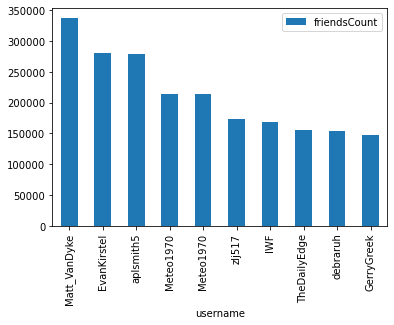

In [43]:
sorted_tweets_friends.head(10).plot.bar(y='friendsCount',x='username')

In [44]:
sorted_tweets_friends.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
93391,snscrape.modules.twitter.Tweet,https://twitter.com/Matt_VanDyke/status/1524834387522637830,2022-05-12 19:30:22+00:00,My recent appearance on @TheWO17 #Report on @Coalition_Radio with @irinatsukerman_.\n\nWe discussed how my 501c3 non-profit organization Sons of Liberty International (@OfficialSOLI) is training forces in #Ukraine to fight #Russia.\n\n#StandWithUkraine \n\nhttps://t.co/bZPvpv9wiL,My recent appearance on @TheWO17 #Report on @Coalition_Radio with @irinatsukerman_.\n\nWe discussed how my 501c3 non-profit organization Sons of Liberty International (@OfficialSOLI) is training forces in #Ukraine to fight #Russia.\n\n#StandWithUkraine \n\nyoutu.be/9SzxKij3Nn0,1524834387522637830,"{'_type': 'snscrape.modules.twitter.User', 'username': 'Matt_VanDyke', 'id': 431071870, 'displayname': 'Matthew VanDyke', 'description': 'Founder, Sons of Liberty International, #veterans training forces to fight against terrorists and dictators. 501c3 nonprofit org. SonsOfLibertyInternational.com', 'rawDescription': 'Founder, Sons of Liberty International, #veterans training forces to fight against terrorists and dictators. 501c3 nonprofit org. https://t.co/iJVW8PgiN9', 'descriptionUrls': [{'text': 'SonsOfLibertyInternational.com', 'url': 'http://SonsOfLibertyInternational.com', 'tcourl': 'https://t.co/iJVW8PgiN9', 'indices': [130, 153]}], 'verified': True, 'created': '2011-12-07T21:56:51+00:00', 'followersCount': 440685, 'friendsCount': 336610, 'statusesCount': 5041, 'favouritesCount': 6957, 'listedCount': 1569, 'mediaCount': 527, 'location': 'Ukraine', 'protected': False, 'linkUrl': 'http://www.matthewvandyke.com', 'linkTcourl': 'https://t.co/nYbedJ5JEH', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/571618282881298432/qZCHume4_normal.jpeg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/431071870/1435933591', 'label': None, 'url': 'https://twitter.com/Matt_VanDyke'}",5,18,77,...,2011-12-07T21:56:51+00:00,527,1569,6957,5041,336610,440685,Ukraine,1.0,pos
60055,snscrape.modules.twitter.Tweet,https://twitter.com/EvanKirstel/status/1525462902114746372,2022-05-14 13:07:52+00:00,"Putin's Stalinist deportation plan for 2MILLION Ukrainians: chilling official blueprint for mass expulsion and 1,310 'transit centres' - drawn up before invasion began #russia #ukraine 😡 https://t.co/VtopkrtGc5","Putin's Stalinist deportation plan for 2MILLION Ukrainians: chilling official blueprint for mass expulsion and 1,310 'transit centres' - drawn up before invasion began #russia #ukraine 😡 mol.im/a/10814841",1525462902114746372,"{'_type': 'snscrape.modules.twitter.User', 'username': 'EvanKirstel', 'id': 35203319, 'displayname': '🇺🇦Evan Kirstel #TechFluencer', 'description': 'Tech influencer, content creator & Industry Insider w/ 500K+ Social Media followers focused on Enterprise 💻 Cloud ☁️5G 📡AI 🤖Telecom ☎️ Voice 🗣 CX & beyond.', 'rawDescription': 'Tech influencer, content creator & Industry Insider w/ 500K+ Social Media followers focused on Enterprise 💻 Cloud ☁️5G 📡AI 🤖Telecom ☎️ Voice 🗣 CX & beyond.', 'descriptionUrls': None, 'verified': False, 'created': '2009-04-25T12:45:16+00:00', 'followersCount': 324654, 'friendsCount': 280357, 'statusesCount': 1085671, 'favouritesCount': 590560, 'listedCount': 13089, 'mediaCount': 299397, 'location': 'Boston, MA', 'protected': False, 'linkUrl': 'https://linktr.ee/EvanKirstel', 'linkTcourl': 'https://t.co/JL6As8H9XS', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1483222456563384321/wYCiARLh_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/35203319/1649362490', 'label': None, 'url': 'https://twitter.com/EvanKirstel'}",0,3,3,...,2009-04-25T12:45:16+00:00,299397,13089,590560,1085671,280357,324654,"Boston, MA",-4.0,neg
7565,snscrape.modules.twitter.Tweet,https://twitte

# utilisateur qui à liké le plus grand nombre de tweet 

In [45]:
sorted_tweets_favourites = df_en.sort_values(by = 'favouritesCount', ascending=False)

<AxesSubplot:xlabel='username'>

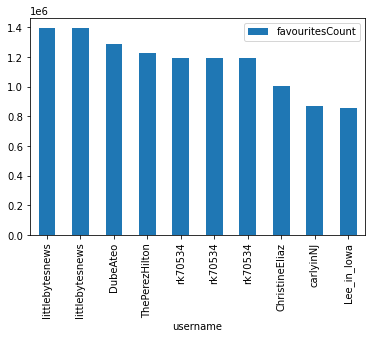

In [46]:
sorted_tweets_favourites.head(10).plot.bar(y='favouritesCount',x='username')

In [47]:
sorted_tweets_favourites.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,sentiment,label
24960,snscrape.modules.twitter.Tweet,https://twitter.com/littlebytesnews/status/1525764743155392513,2022-05-15 09:07:16+00:00,"RT:\n\nKalush Orchestra released a post-Eurovision video for their winning song Stefania, shot in Bucha, Irpin, Hostomel and Borodyanka which were destroyed by the Russians: #Ukraine https://t.co/APD6AEWFkg\n\n— KT ""Special Intelligence Operation"" (@KremlinTrolls) May 15, 2022","RT:\n\nKalush Orchestra released a post-Eurovision video for their winning song Stefania, shot in Bucha, Irpin, Hostomel and Borodyanka which were destroyed by the Russians: #Ukraine bit.ly/3LdLIX9\n\n— KT ""Special Intelligence Operation"" (@KremlinTrolls) May 15, 2022",1525764743155392513,"{'_type': 'snscrape.modules.twitter.User', 'username': 'littlebytesnews', 'id': 12896172, 'displayname': 'Patty 🌻🇺🇸🌵', 'description': 'SAHM/blogger;tweet abt politics to parenting&everything in btwn(feed) #prolife #vaxed🚫#COVID19 mandates #news Contribute/Subscribe bit.ly/2zSmoTw', 'rawDescription': 'SAHM/blogger;tweet abt politics to parenting&everything in btwn(feed) #prolife #vaxed🚫#COVID19 mandates #news Contribute/Subscribe https://t.co/pNW32dq3V0', 'descriptionUrls': [{'text': 'bit.ly/2zSmoTw', 'url': 'http://bit.ly/2zSmoTw', 'tcourl': 'https://t.co/pNW32dq3V0', 'indices': [131, 154]}], 'verified': False, 'created': '2008-01-31T01:53:37+00:00', 'followersCount': 20680, 'friendsCount': 13460, 'statusesCount': 1274340, 'favouritesCount': 1395074, 'listedCount': 1002, 'mediaCount': 33253, 'location': 'USA', 'protected': False, 'linkUrl': 'https://www.littlebytesnews.com', 'linkTcourl': 'https://t.co/Rstb5ezele', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/872237122710757376/PS5Jn919_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/12896172/1502001700', 'label': None, 'url': 'https://twitter.com/littlebytesnews'}",0,0,0,...,2008-01-31T01:53:37+00:00,33253,1002,1395074,1274340,13460,20680,USA,1.0,pos
85600,snscrape.modules.twitter.Tweet,https://twitter.com/littlebytesnews/status/1525006148675543041,2022-05-13 06:52:53+00:00,"RT:\n\n#Ukraine - 'No time to hide' for Ukraine social worker in town near front line. 📸 @dilkoff #AFP https://t.co/mNenRUentg\n\n— AFP Photo (@AFPphoto) May 13, 2022","RT:\n\n#Ukraine - 'No time to hide' for Ukraine social worker in town near front line. 📸 @dilkoff #AFP bit.ly/3w9trWN\n\n— AFP Photo (@AFPphoto) May 13, 2022",1525006148675543041,"{'_type': 'snscrape.modules.twitter.User', 'username': 'littlebytesnews', 'id': 12896172, 'displayname': 'Patty 🌻🇺🇸🌵', 'description': 'SAHM/blogger;tweet abt politics to parenting&everything in btwn(feed) #prolife #vaxed🚫#COVID19 mandates #news Contribute/Subscribe bit.ly/2zSmoTw', 'rawDescription': 'SAHM/blogger;tweet abt politics to parenting&everything in btwn(feed) #prolife #vaxed🚫#COVID19 mandates #news Contribute/Subscribe https://t.co/pNW32dq3V0', 'descriptionUrls': [{'text': 'bit.ly/2zSmoTw', 'url': 'http://bit.ly/2zSmoTw', 'tcourl': 'https://t.co/pNW32dq3V0', 'indices': [131, 154]}], 'verified': False, 'created': '2008-01-31T01:53:37+00:00', 'followersCount': 20680, 'friendsCount': 13460, 'statusesCount': 1274341, 'favouritesCount': 1395074, 'listedCount': 1002, 'mediaCount': 33253, 'location': 'USA', 'protected': False, 'linkUrl': 'https://www.littlebytesnews.com', 'linkTcourl': 'https://t.co/Rstb5ezele', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/872237122710757376/PS5Jn919_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/12896172/1502001700', 'label': None, 'url': 'https://twitter.com/littlebytesnews'}",0,0,0,...,2008-01-31T01:53:37+00:00,33253,1002,1395074,1274341,13460,20680,USA,-2.0,neg
41732,snscrape.modules.twitter.Tweet,https://twitter.com/DubeAteo/status/1525612963779993608,2022-05-14 23:

# utilisateurs possedant le plus grand nombre de tweets

In [48]:
df_en.username.value_counts()

KabalexChild       601
UkraineNews24_7    446
knittingknots      438
RisksAssociated    394
Fidget02           328
                  ... 
L74JR              1  
Scottish_Geek      1  
ConstantinGorea    1  
SolihullUpdates    1  
workforgooduk      1  
Name: username, Length: 28833, dtype: int64

# sentiments des russes 

# preparation des données pour le wordcloud

In [49]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df_en["content"] = df_en["content"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# wordcloud de tous les tweets

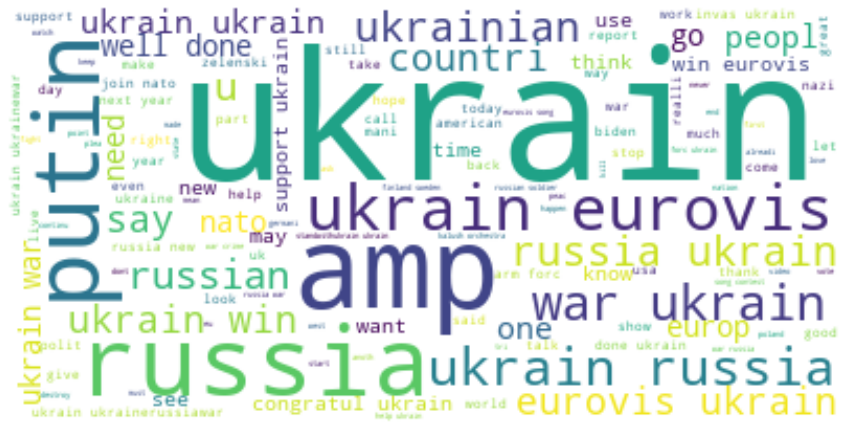

In [50]:
text = " ".join(i for i in df_en.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud des tweets negatif

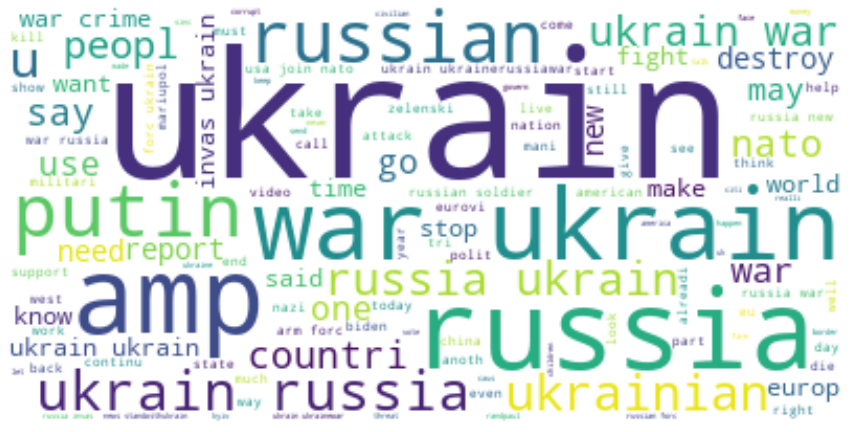

In [51]:
negative =' '.join([i for i in df_en['content'][df_en['sentiment'] < 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud des tweets positifs

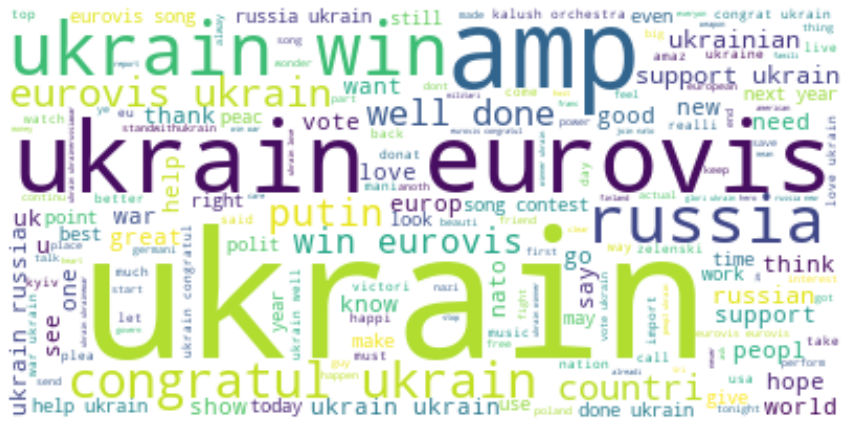

In [52]:
positif =' '.join([i for i in df_en['content'][df_en['sentiment'] > 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positif)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud des tweets neutres

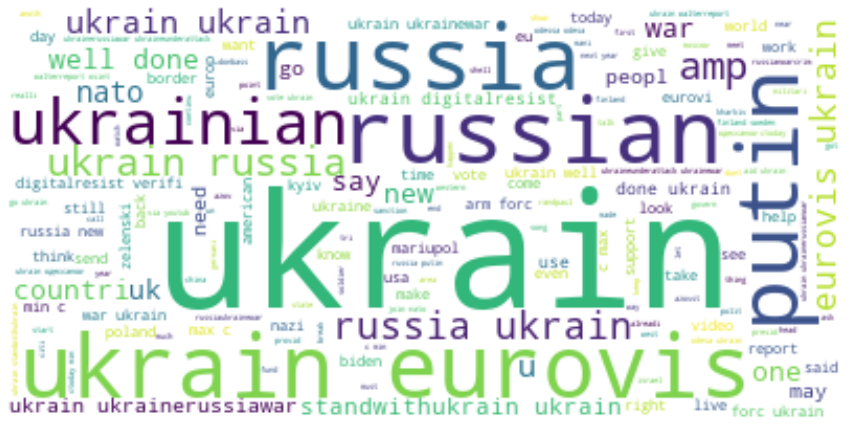

In [53]:
neutre =' '.join([i for i in df_en['content'][df_en['sentiment'] == 0]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neutre)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyse Hashtags

In [54]:
hashtags = [item for l in df['hashtags'].dropna() for item in l]
hashtags

hashtags_Positifs=[item for l in df_en['hashtags'][df_en['sentiment']>0].dropna() for item in l]
hashtags_Negatifs=[item for l in df_en['hashtags'][df_en['sentiment']<0].dropna() for item in l]

In [55]:
topXItem = 10
from collections import Counter

x_hashtags = Counter(hashtags)
x_hashtags_Positifs = Counter(hashtags_Positifs)
x_hashtags_Negatifs = Counter(hashtags_Negatifs)

topXItemList_hashtags = x_hashtags.most_common(topXItem)
topXItemList_hashtags_Positifs = x_hashtags_Positifs.most_common(topXItem)
topXItemList_hashtags_Negatifs = x_hashtags_Negatifs.most_common(topXItem)

<AxesSubplot:xlabel='Hashtag'>

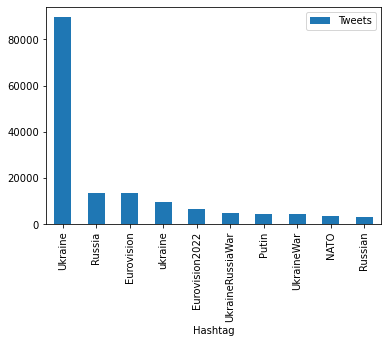

In [56]:
df_hash = pd.DataFrame(topXItemList_hashtags)
df_hash.columns =['Hashtag','Tweets']
df_hash.plot.bar(x='Hashtag', y='Tweets', rot=90)


## Hashtag positifs

<AxesSubplot:xlabel='Hashtag'>

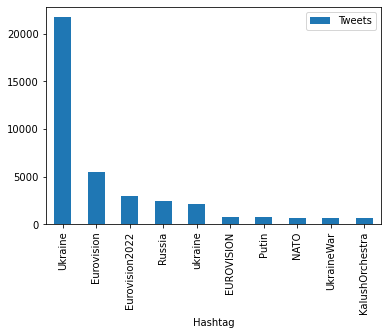

In [57]:
df_hash_positif = pd.DataFrame(topXItemList_hashtags_Positifs)
df_hash_positif.columns =['Hashtag','Tweets']
df_hash_positif.plot.bar(x='Hashtag', y='Tweets', rot=90)


## Hashtag negatifs

<AxesSubplot:xlabel='Hashtag'>

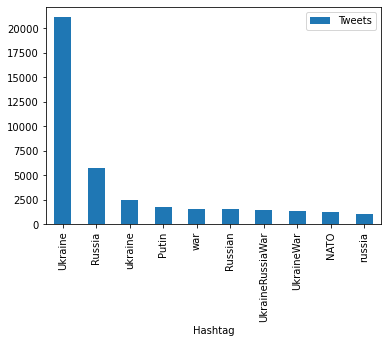

In [58]:
df_hash_negatifs = pd.DataFrame(topXItemList_hashtags_Negatifs)
df_hash_negatifs.columns =['Hashtag','Tweets']
df_hash_negatifs.plot.bar(x='Hashtag', y='Tweets', rot=90)


In [59]:
# # definition des x et y 
# dates = df_count_tweet['Date']
# y = df_count_tweet['tweet_count']

# Analyse des tweets en russe

In [60]:
df_ru = df[df.lang == 'ru'].drop('lang', axis=1)

In [61]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
tokens = tokenizer.split('всё очень плохо')  # [('всё', None), ('очень', None), ('плохо', None)]

model = FastTextSocialNetworkModel(tokenizer=tokenizer)

messages = df_ru.content

results = model.predict(messages, k=1)


In [62]:
label=[]
sentiment=[]
for i in range(len(results)):
    label.append(list(results[i].keys())[0])
    sentiment.append((list(results[i].values())[0]))

df_ru["label"]=label
df_ru["sentiment"]=sentiment


<AxesSubplot:xlabel='label', ylabel='Count'>

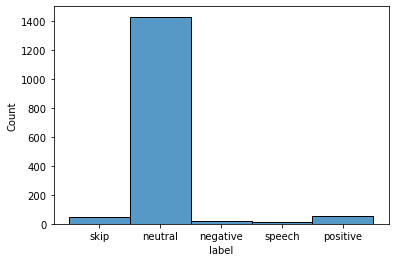

In [63]:
sns.histplot(df_ru["label"])

# tweet le plus retweeté 

In [64]:
sorted_tweets_ru = df_ru.sort_values(by = 'retweetCount', ascending=False)
most_retweeted = sorted_tweets_ru.iloc[0]
phrase=df.content[(df['date']==most_retweeted['date']) & (df['username']==most_retweeted['username'])]
phrase = " ".join(phrase)
print('*'+'-'*30+'Tweet'+'-'*30+'*')
print(phrase)
print('*'+'-'*30+'Details du Tweet'+'-'*30+'*')
print(most_retweeted)

*------------------------------Tweet------------------------------*
В Украине погиб боец батальона Калиновского Павел «Волат». Он был смертельно ранен во время операции по освобождению украинской деревни от российских войск.
#Belarus #Ukraine #AzovstaI #NoWar https://t.co/rGkMWv2JeC
*------------------------------Details du Tweet------------------------------*
_type               snscrape.modules.twitter.Tweet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [65]:
sorted_tweets_ru.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,label,sentiment
6238,snscrape.modules.twitter.Tweet,https://twitter.com/nagletsioda/status/1526110694478848001,2022-05-16 08:01:57+00:00,В Украине погиб боец батальона Калиновского Павел «Волат». Он был смертельно ранен во время операции по освобождению украинской деревни от российских войск.\n#Belarus #Ukraine #AzovstaI #NoWar https://t.co/rGkMWv2JeC,В Украине погиб боец батальона Калиновского Павел «Волат». Он был смертельно ранен во время операции по освобождению украинской деревни от российских войск.\n#Belarus #Ukraine #AzovstaI #NoWar https://t.co/rGkMWv2JeC,1526110694478848001,"{'_type': 'snscrape.modules.twitter.User', 'username': 'nagletsioda', 'id': 1314396097905909767, 'displayname': 'Vlad', 'description': 'Kuklavod', 'rawDescription': 'Kuklavod', 'descriptionUrls': None, 'verified': False, 'created': '2020-10-09T02:43:58+00:00', 'followersCount': 59, 'friendsCount': 27, 'statusesCount': 94, 'favouritesCount': 67, 'listedCount': 1, 'mediaCount': 30, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1314399916266004480/IOuaO68x_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1314396097905909767/1602212470', 'label': None, 'url': 'https://twitter.com/nagletsioda'}",12,70,80,...,2020-10-09T02:43:58+00:00,30,1,67,94,27,59,,neutral,0.672342
49509,snscrape.modules.twitter.Tweet,https://twitter.com/berdynskykh_k/status/1525574765162942465,2022-05-14 20:32:22+00:00,"Абсолютно все равно дисквалифицируют Калуш за слова Save Mariupol, Save Azovstal или нет. Спасибо им огромное, что это сказали. Это поступок #Eurovision #Ukraine","Абсолютно все равно дисквалифицируют Калуш за слова Save Mariupol, Save Azovstal или нет. Спасибо им огромное, что это сказали. Это поступок #Eurovision #Ukraine",1525574765162942465,"{'_type': 'snscrape.modules.twitter.User', 'username': 'berdynskykh_k', 'id': 949681897, 'displayname': 'Kristina Berdynskykh', 'description': 'journalist NV.ua', 'rawDescription': 'journalist https://t.co/r1nhFENwsH', 'descriptionUrls': [{'text': 'NV.ua', 'url': 'http://NV.ua', 'tcourl': 'https://t.co/r1nhFENwsH', 'indices': [11, 34]}], 'verified': False, 'created': '2012-11-15T12:46:35+00:00', 'followersCount': 48920, 'friendsCount': 277, 'statusesCount': 7628, 'favouritesCount': 6104, 'listedCount': 1154, 'mediaCount': 1392, 'location': 'Kyiv', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1023672885234290688/wKuNcKHj_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/949681897/1645470063', 'label': None, 'url': 'https://twitter.com/berdynskykh_k'}",11,67,665,...,2012-11-15T12:46:35+00:00,1392,1154,6104,7628,277,48920,Kyiv,neutral,0.196836
82965,snscrape.modules.twitter.Tweet,https://twitter.com/AlfaNubovsky/status/1525045629822582786,2022-05-13 09:29:46+00:00,"по Университетской мимо Изумруда и затем через Осв. Донбасса на Артема в северном напр. ""что-то"" с телескопическими мачтами на базе КамАЗа, больше всего похоже Р-166 «Артек» #Донецьк #Україна #Donetsk #Ukraine #RussianUkraineWar","по Университетской мимо Изумруда и затем через Осв. Донбасса на Артема в северном напр. ""что-то"" с телескопическими мачтами на базе КамАЗа, больше всего похоже Р-166 «Артек» #Донецьк #Україна #Donetsk #Ukraine #RussianUkraineWar",1525045629822582786,"{'_type': 'snscrape.modules.twitter.User', 'username': 'AlfaNubovsky', 'id': 2810124656, 'displayname': 'Alfa Nubovsky', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2014-09-14T21:01:01+00:00', 'followersCount': 3079, 'friendsCount': 33, 'statusesCount': 10405, 'favouritesCount': 398, 'listedCount': 41, 'mediaCount': 246, 'location': 'зона ООС', 'protected': False

# tweet les plus cités par les utilisateurs (quotecount)

In [66]:
sorted_tweets_quote_ru = df_ru.sort_values(by = 'quoteCount', ascending=False)

<AxesSubplot:xlabel='username'>

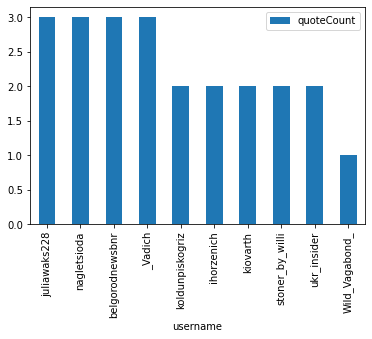

In [67]:
sorted_tweets_quote_ru.head(10).plot.bar(y='quoteCount',x='username')

In [68]:
sorted_tweets_quote_ru.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,label,sentiment
38911,snscrape.modules.twitter.Tweet,https://twitter.com/juliawaks228/status/1525614043884662786,2022-05-14 23:08:27+00:00,Как будет проходить Евровидение в следующем году\n\n#Ukraine\n#Eurovision2022\n#Eurovision https://t.co/5QZFxjLjXa,Как будет проходить Евровидение в следующем году\n\n#Ukraine\n#Eurovision2022\n#Eurovision https://t.co/5QZFxjLjXa,1525614043884662786,"{'_type': 'snscrape.modules.twitter.User', 'username': 'juliawaks228', 'id': 742693403100602368, 'displayname': '🆕ъᴇбūᴛᴇльнø Пр∆в∆| 🕊️ #нетвойне', 'description': '19у.о✨не k-попер✨делаю оформы ✨человек-дерьмо✨LGBT+🍂социопат✨aгностик✨вегетарианец✨люблю пиво 🍺', 'rawDescription': '19у.о✨не k-попер✨делаю оформы ✨человек-дерьмо✨LGBT+🍂социопат✨aгностик✨вегетарианец✨люблю пиво 🍺', 'descriptionUrls': None, 'verified': False, 'created': '2016-06-14T12:21:20+00:00', 'followersCount': 14894, 'friendsCount': 9724, 'statusesCount': 18686, 'favouritesCount': 11466, 'listedCount': 60, 'mediaCount': 3552, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1500597134831276035/mOa1Tf2K_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/742693403100602368/1646605212', 'label': None, 'url': 'https://twitter.com/juliawaks228'}",4,0,8,...,2016-06-14T12:21:20+00:00,3552,60,11466,18686,9724,14894,,neutral,0.919653
6238,snscrape.modules.twitter.Tweet,https://twitter.com/nagletsioda/status/1526110694478848001,2022-05-16 08:01:57+00:00,В Украине погиб боец батальона Калиновского Павел «Волат». Он был смертельно ранен во время операции по освобождению украинской деревни от российских войск.\n#Belarus #Ukraine #AzovstaI #NoWar https://t.co/rGkMWv2JeC,В Украине погиб боец батальона Калиновского Павел «Волат». Он был смертельно ранен во время операции по освобождению украинской деревни от российских войск.\n#Belarus #Ukraine #AzovstaI #NoWar https://t.co/rGkMWv2JeC,1526110694478848001,"{'_type': 'snscrape.modules.twitter.User', 'username': 'nagletsioda', 'id': 1314396097905909767, 'displayname': 'Vlad', 'description': 'Kuklavod', 'rawDescription': 'Kuklavod', 'descriptionUrls': None, 'verified': False, 'created': '2020-10-09T02:43:58+00:00', 'followersCount': 59, 'friendsCount': 27, 'statusesCount': 94, 'favouritesCount': 67, 'listedCount': 1, 'mediaCount': 30, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1314399916266004480/IOuaO68x_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1314396097905909767/1602212470', 'label': None, 'url': 'https://twitter.com/nagletsioda'}",12,70,80,...,2020-10-09T02:43:58+00:00,30,1,67,94,27,59,,neutral,0.672342
35492,snscrape.modules.twitter.Tweet,https://twitter.com/belgorodnewsbnr/status/1525617425034665984,2022-05-14 23:21:53+00:00,‼️ Белгород поздравляет #Украину с победой на Евровидения 2022!\n\nKalush Orchestra - вы супер!\n\nБелгород - это #Украина! Не забывайте о нас после возвращения Крыма!\n\n#Евровидение #Евробачення #Eurovision #Eurovision2022 #EUROVISION #EUROVISION2022 #KalushOrchestra #Ukraine https://t.co/kNhsvThBcD,‼️ Белгород поздравляет #Украину с победой на Евровидения 2022!\n\nKalush Orchestra - вы супер!\n\nБелгород - это #Украина! Не забывайте о нас после возвращения Крыма!\n\n#Евровидение #Евробачення #Eurovision #Eurovision2022 #EUROVISION #EUROVISION2022 #KalushOrchestra #Ukraine https://t.co/kNhsvThBcD,1525617425034665984,"{'_type': 'snscrape.modules.twitter.User', 'username': 'belgorodnewsbnr', 'id': 1142863047314280450, 'displayname': 'Белгород новости (БНР News)', 'description': 'Новости Белгорода. Белгород новости. Belgorod news. БНР. Белгород онлайн. #Белгород #Belgorod #news #now #today #Белгородсегодня', 'rawDescription': '

# tweets les plus commentés 

In [69]:
sorted_tweets_reply_ru = df_ru.sort_values(by = 'replyCount', ascending=False)

<AxesSubplot:xlabel='username'>

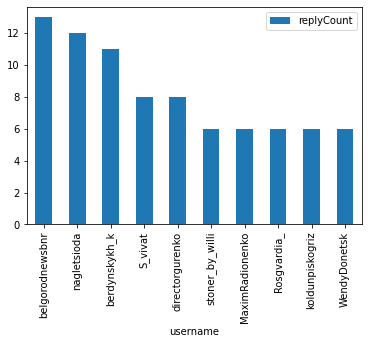

In [70]:
sorted_tweets_reply_ru.head(10).plot.bar(y='replyCount',x='username')

In [71]:
sorted_tweets_reply_ru.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,label,sentiment
35492,snscrape.modules.twitter.Tweet,https://twitter.com/belgorodnewsbnr/status/1525617425034665984,2022-05-14 23:21:53+00:00,‼️ Белгород поздравляет #Украину с победой на Евровидения 2022!\n\nKalush Orchestra - вы супер!\n\nБелгород - это #Украина! Не забывайте о нас после возвращения Крыма!\n\n#Евровидение #Евробачення #Eurovision #Eurovision2022 #EUROVISION #EUROVISION2022 #KalushOrchestra #Ukraine https://t.co/kNhsvThBcD,‼️ Белгород поздравляет #Украину с победой на Евровидения 2022!\n\nKalush Orchestra - вы супер!\n\nБелгород - это #Украина! Не забывайте о нас после возвращения Крыма!\n\n#Евровидение #Евробачення #Eurovision #Eurovision2022 #EUROVISION #EUROVISION2022 #KalushOrchestra #Ukraine https://t.co/kNhsvThBcD,1525617425034665984,"{'_type': 'snscrape.modules.twitter.User', 'username': 'belgorodnewsbnr', 'id': 1142863047314280450, 'displayname': 'Белгород новости (БНР News)', 'description': 'Новости Белгорода. Белгород новости. Belgorod news. БНР. Белгород онлайн. #Белгород #Belgorod #news #now #today #Белгородсегодня', 'rawDescription': 'Новости Белгорода. Белгород новости. Belgorod news. БНР. Белгород онлайн. #Белгород #Belgorod #news #now #today #Белгородсегодня', 'descriptionUrls': None, 'verified': False, 'created': '2019-06-23T18:32:38+00:00', 'followersCount': 475, 'friendsCount': 284, 'statusesCount': 209, 'favouritesCount': 362, 'listedCount': 6, 'mediaCount': 121, 'location': 'Белгород ', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1516115905507475468/dENLCzBc_normal.jpg', 'profileBannerUrl': None, 'label': None, 'url': 'https://twitter.com/belgorodnewsbnr'}",13,19,247,...,2019-06-23T18:32:38+00:00,121,6,362,209,284,475,Белгород,neutral,0.287778
6238,snscrape.modules.twitter.Tweet,https://twitter.com/nagletsioda/status/1526110694478848001,2022-05-16 08:01:57+00:00,В Украине погиб боец батальона Калиновского Павел «Волат». Он был смертельно ранен во время операции по освобождению украинской деревни от российских войск.\n#Belarus #Ukraine #AzovstaI #NoWar https://t.co/rGkMWv2JeC,В Украине погиб боец батальона Калиновского Павел «Волат». Он был смертельно ранен во время операции по освобождению украинской деревни от российских войск.\n#Belarus #Ukraine #AzovstaI #NoWar https://t.co/rGkMWv2JeC,1526110694478848001,"{'_type': 'snscrape.modules.twitter.User', 'username': 'nagletsioda', 'id': 1314396097905909767, 'displayname': 'Vlad', 'description': 'Kuklavod', 'rawDescription': 'Kuklavod', 'descriptionUrls': None, 'verified': False, 'created': '2020-10-09T02:43:58+00:00', 'followersCount': 59, 'friendsCount': 27, 'statusesCount': 94, 'favouritesCount': 67, 'listedCount': 1, 'mediaCount': 30, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1314399916266004480/IOuaO68x_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1314396097905909767/1602212470', 'label': None, 'url': 'https://twitter.com/nagletsioda'}",12,70,80,...,2020-10-09T02:43:58+00:00,30,1,67,94,27,59,,neutral,0.672342
49509,snscrape.modules.twitter.Tweet,https://twitter.com/berdynskykh_k/status/1525574765162942465,2022-05-14 20:32:22+00:00,"Абсолютно все равно дисквалифицируют Калуш за слова Save Mariupol, Save Azovstal или нет. Спасибо им огромное, что это сказали. Это поступок #Eurovision #Ukraine","Абсолютно все равно дисквалифицируют Калуш за слова Save Mariupol, Save Azovstal или нет. Спасибо им огромное, что это сказали. Это поступок #Eurovision #Ukraine",1525574765162942465,"{'_type': 'snscrape.modules.twitter.User', 'username': 'berdynskykh_k', 'id': 949681897, 'displayname': 'Kristina Berdynskykh', 'description': 'journalist NV.ua', 'rawDescription': 'journalist https://t.co/r

# compte le plus liké

In [72]:
sorted_tweets_like_ru = df_ru.sort_values(by = 'likeCount', ascending=False)

<AxesSubplot:xlabel='username'>

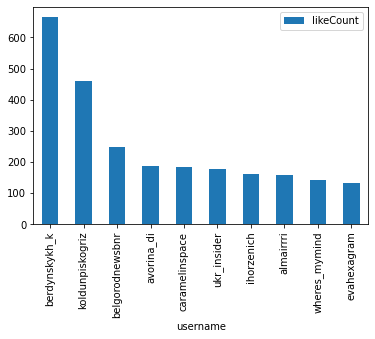

In [73]:
sorted_tweets_like_ru.head(10).plot.bar(y='likeCount',x='username')

In [74]:
sorted_tweets_like_ru.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,created,mediaCount,listedCount,favouritesCount,statusesCount,friendsCount,followersCount,location,label,sentiment
49509,snscrape.modules.twitter.Tweet,https://twitter.com/berdynskykh_k/status/1525574765162942465,2022-05-14 20:32:22+00:00,"Абсолютно все равно дисквалифицируют Калуш за слова Save Mariupol, Save Azovstal или нет. Спасибо им огромное, что это сказали. Это поступок #Eurovision #Ukraine","Абсолютно все равно дисквалифицируют Калуш за слова Save Mariupol, Save Azovstal или нет. Спасибо им огромное, что это сказали. Это поступок #Eurovision #Ukraine",1525574765162942465,"{'_type': 'snscrape.modules.twitter.User', 'username': 'berdynskykh_k', 'id': 949681897, 'displayname': 'Kristina Berdynskykh', 'description': 'journalist NV.ua', 'rawDescription': 'journalist https://t.co/r1nhFENwsH', 'descriptionUrls': [{'text': 'NV.ua', 'url': 'http://NV.ua', 'tcourl': 'https://t.co/r1nhFENwsH', 'indices': [11, 34]}], 'verified': False, 'created': '2012-11-15T12:46:35+00:00', 'followersCount': 48920, 'friendsCount': 277, 'statusesCount': 7628, 'favouritesCount': 6104, 'listedCount': 1154, 'mediaCount': 1392, 'location': 'Kyiv', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1023672885234290688/wKuNcKHj_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/949681897/1645470063', 'label': None, 'url': 'https://twitter.com/berdynskykh_k'}",11,67,665,...,2012-11-15T12:46:35+00:00,1392,1154,6104,7628,277,48920,Kyiv,neutral,0.196836
40864,snscrape.modules.twitter.Tweet,https://twitter.com/koldunpiskogriz/status/1525613229795426306,2022-05-14 23:05:13+00:00,"то, как ползала крикнуло ""героям слава""...... \nя буквально плачу\n#Eurovision2022 #EUROVISION #Ukraine https://t.co/WMj9lEYhGm","то, как ползала крикнуло ""героям слава""...... \nя буквально плачу\n#Eurovision2022 #EUROVISION #Ukraine https://t.co/WMj9lEYhGm",1525613229795426306,"{'_type': 'snscrape.modules.twitter.User', 'username': 'koldunpiskogriz', 'id': 1198587923400155136, 'displayname': 'лишайный опоссум', 'description': 'don't send nudes SEND HELP', 'rawDescription': 'don't send nudes SEND HELP', 'descriptionUrls': None, 'verified': False, 'created': '2019-11-24T13:04:46+00:00', 'followersCount': 7, 'friendsCount': 27, 'statusesCount': 6606, 'favouritesCount': 61, 'listedCount': 0, 'mediaCount': 4102, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1511464211179839502/VZIcm_qW_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1198587923400155136/1633550359', 'label': None, 'url': 'https://twitter.com/koldunpiskogriz'}",6,38,459,...,2019-11-24T13:04:46+00:00,4102,0,61,6606,27,7,,neutral,0.392347
35492,snscrape.modules.twitter.Tweet,https://twitter.com/belgorodnewsbnr/status/1525617425034665984,2022-05-14 23:21:53+00:00,‼️ Белгород поздравляет #Украину с победой на Евровидения 2022!\n\nKalush Orchestra - вы супер!\n\nБелгород - это #Украина! Не забывайте о нас после возвращения Крыма!\n\n#Евровидение #Евробачення #Eurovision #Eurovision2022 #EUROVISION #EUROVISION2022 #KalushOrchestra #Ukraine https://t.co/kNhsvThBcD,‼️ Белгород поздравляет #Украину с победой на Евровидения 2022!\n\nKalush Orchestra - вы супер!\n\nБелгород - это #Украина! Не забывайте о нас после возвращения Крыма!\n\n#Евровидение #Евробачення #Eurovision #Eurovision2022 #EUROVISION #EUROVISION2022 #KalushOrchestra #Ukraine https://t.co/kNhsvThBcD,1525617425034665984,"{'_type': 'snscrape.modules.twitter.User', 'username': 'belgorodnewsbnr', 'id': 1142863047314280450, 'displayname': 'Белгород новости (БНР News)', 'description': 'Новости Белгорода. Белгород новости. Belgorod news. БНР. Белгород онлайн. #Белгород #Belgorod #news #now #today #Белгородсегодня', 'rawDescription': 'Новости Белгорода. Белгород новости. Belgorod news. БНР. Белгород

# scrapper les tweet de Biden, poutin, zelensky et macron

In [75]:
queryJB ="(from:POTUS) since:2022-02-01"
queryVP ="(from:KremlinRussia_E) since:2022-02-01"
queryEM ="(from:EmmanuelMacron) since:2022-02-01"
queryVZ ="(from:ZelenskyyUa) since:2022-02-01"
query=[queryJB,queryVP,queryEM,queryVZ]

df_POTUS=[]
df_KremlinRussia_E=[]
df_EmmanuelMacron=[]
df_ZelenskyyUa=[]
presidents=[df_POTUS,df_KremlinRussia_E,df_EmmanuelMacron,df_ZelenskyyUa]

limits =2000
president=0

for query in query:
    tweets = []
    for tweet in scpt.TwitterSearchScraper(query).get_items():

        if len(tweets)==limits :
            break
        else :
            tweets.append([tweet.date, tweet.user.username,tweet.user.displayname,tweet.user.description,tweet.user.followersCount,tweet.user.friendsCount,
                        tweet.user.statusesCount,tweet.user.favouritesCount,tweet.user.listedCount,tweet.user.mediaCount,tweet.user.location,tweet.content,
                        tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.lang,tweet.hashtags])
        
    presidents[president] = pd.DataFrame(tweets, columns = ['Date','Username','displayname','UserDescription','followersCount','friendsCount','statusesCount','favouritesCount',
                                            'listedCount','mediaCount','location','content','replyCount','retweetCount','likeCount','quoteCount','lang','hashtags'])
    president=president+1

df_POTUS=presidents[0]
df_KremlinRussia_E=presidents[1]
df_EmmanuelMacron=presidents[2]
df_ZelenskyyUa= presidents[3]

# Evolution du nombre de tweets/jour des presidents

In [76]:
# dateTime to date 
for df in presidents:
    df['Date'] = pd.to_datetime(df['Date']).dt.date

In [77]:
df_count_tweet_POTUS=0
df_count_tweet_KremlinRussia_E=0
df_count_tweet_EmmanuelMacron=0
df_count_tweet_ZelenskyyUa=0
df_count_tweets=[df_count_tweet_POTUS,df_count_tweet_KremlinRussia_E,df_count_tweet_EmmanuelMacron,df_count_tweet_ZelenskyyUa]
i=0
for df_count_tweet in df_count_tweets:
    df_count_tweets[i] = (presidents[i]
          .value_counts('Date',sort = False)
          .rename_axis('Date')
          .reset_index(name='tweet_count'))
    i+=1

df_count_tweet_POTUS=df_count_tweets[0]
df_count_tweet_KremlinRussia_E=df_count_tweets[1]
df_count_tweet_EmmanuelMacron=df_count_tweets[2]
df_count_tweet_ZelenskyyUa=df_count_tweets[3]

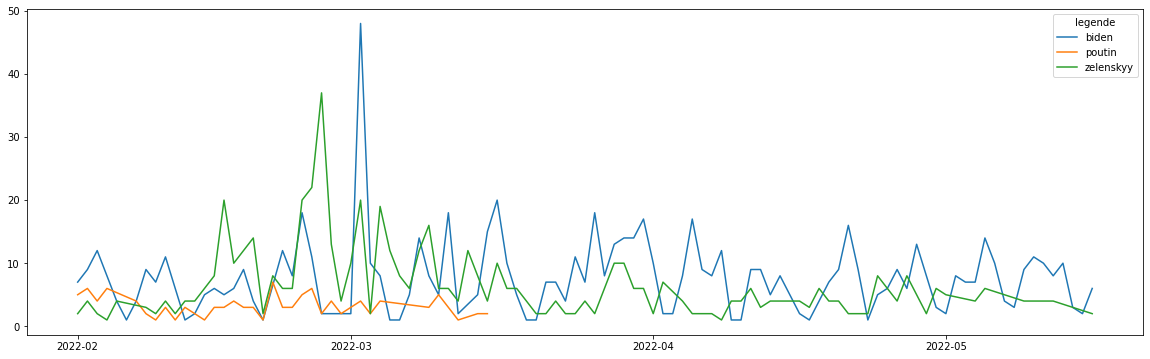

In [78]:
nom_presidents=['biden','poutin','zelenskyy']
presidents=[df_POTUS,df_KremlinRussia_E,df_ZelenskyyUa]
df_count_tweets=[df_count_tweet_POTUS,df_count_tweet_KremlinRussia_E,df_count_tweet_ZelenskyyUa]


i=0
fig, ax = plt.subplots(figsize=(20, 6))
for df in presidents:
    half_year_locator = mdates.MonthLocator(interval=1)
    year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

    ax.xaxis.set_major_locator(half_year_locator)
    ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
    ax.plot(df_count_tweets[i]['Date'], df_count_tweets[i]['tweet_count'])
    legend = plt.legend(nom_presidents, title = 'legende')
    i+=1

# Analyse des sentiments des présisdents 

In [79]:
afinn = Afinn()

for df in presidents:
    aff=[]
    for sentence in df['content']:
        vs=afinn.score(sentence)
        aff.append(vs)
    df['sentiment']=aff

In [80]:
# creation de la colonne label (positif , neutre ou negatif)
THRESHOLD = 0.2
for df in presidents:
    conditions = [
        (df['sentiment'] <= -THRESHOLD), 
        (df['sentiment'] > -THRESHOLD) & (df['sentiment'] < THRESHOLD),
        (df['sentiment'] >= THRESHOLD)
    ]

    values = ["neg","neu", "pos"]
    df['label'] = np.select(conditions, values)

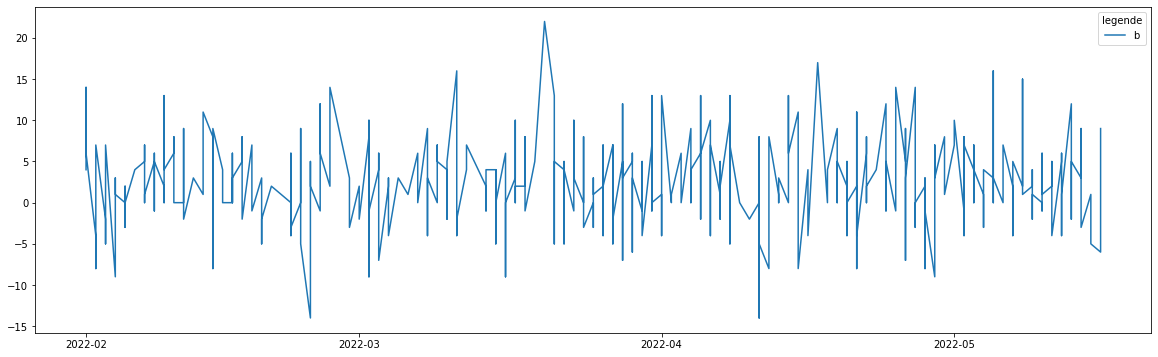

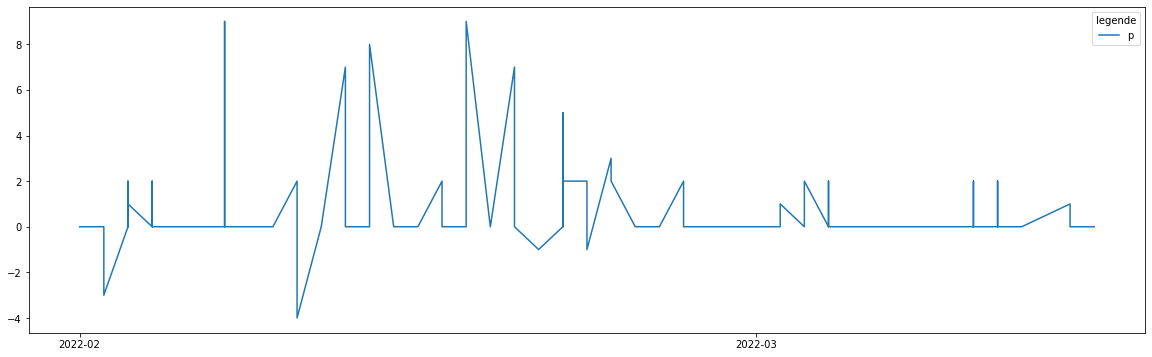

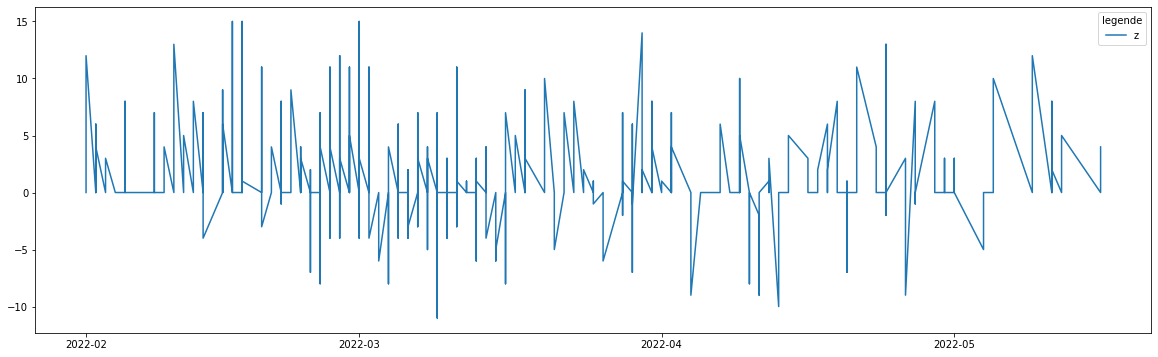

In [81]:
nom_presidents=['biden','poutin','zelenskyy']
presidents=[df_POTUS,df_KremlinRussia_E,df_ZelenskyyUa]

i=0
for df in presidents:
    fig, ax = plt.subplots(figsize=(20, 6))

    half_year_locator = mdates.MonthLocator(interval=1)
    year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

    ax.xaxis.set_major_locator(half_year_locator)
    ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
    ax.plot(df['Date'], df['sentiment'])
    legend = plt.legend(nom_presidents[i], title = 'legende')
    i+=1

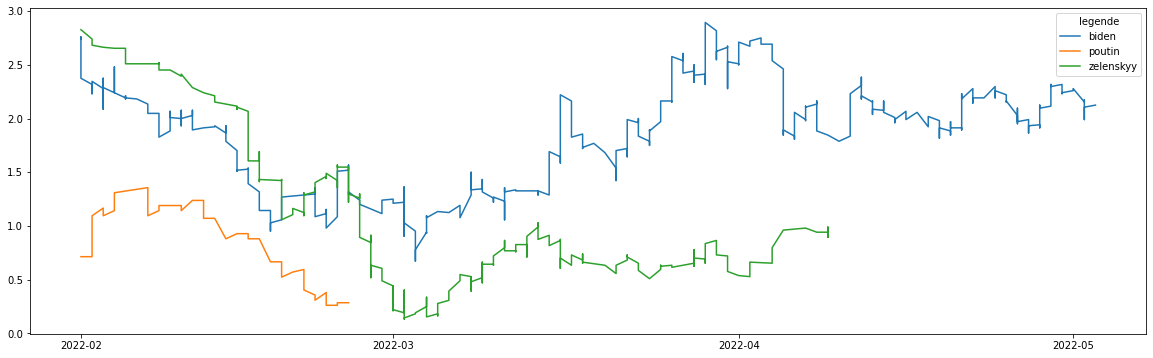

In [82]:
nom_presidents=['biden','poutin','zelenskyy']
presidents=[df_POTUS,df_KremlinRussia_E,df_ZelenskyyUa]
fig, ax = plt.subplots(figsize=(20, 6))

for df in presidents:

    half_year_locator = mdates.MonthLocator(interval=1)
    year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

    ax.xaxis.set_major_locator(half_year_locator)
    ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
    ax.plot(df['Date'], df['sentiment'].rolling((df['Date'].max() - df['Date'].min()).days).mean())
    legend = plt.legend(nom_presidents, title = 'legende')


# tweet pendants les periodes fortes et faibles

In [83]:
df_POTUS.sort_values(by = 'sentiment', ascending=True)
# df_KremlinRussia_E.sort_values(by = 'sentiment', ascending=True)
# df_ZelenskyyUa.sort_values(by = 'sentiment', ascending=True)

,Date,Username,displayname,UserDescription,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,content,replyCount,retweetCount,likeCount,quoteCount,lang,hashtags,sentiment,label
650,2022-02-24,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22281335,12,3177,0,17984,1018,,The prayers of the world are with the people of Ukraine tonight as they suffer an unprovoked and unjustified attack by Russian military forces. President Putin has chosen a premeditated war that will bring a catastrophic loss of life and human suffering. https://t.co/Q7eUJ0CG3k,11855,31312,123690,5872,en,None,-14.0,neg
242,2022-04-11,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22281340,12,3177,0,17984,1018,,"In addition to today’s rule, we’re working in four areas to reduce gun violence:\n \n- Going after rogue gun dealers\n- Disrupting illegal gun trafficking\n- Funding community policing and community violence intervention\n- Funding job training, drug treatment, mental health, and more",2257,2309,12701,259,en,None,-14.0,neg
759,2022-02-04,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22281346,12,3177,0,17984,1018,,"Every day in this country 316 people are shot and 106 are killed. Enough — the scourge of gun violence has to end.\n \nToday, I traveled to New York City to meet with leaders and discuss how we can work together to reduce gun crime and make our communities safer. https://t.co/OicbQCbuIZ",3745,1879,10772,419,en,None,-9.0,neg
597,2022-03-02,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22281344,12,3177,0,17984,1018,,"My predecessor undermined the watchdogs whose job was to keep pandemic relief funds from being wasted.\n \nIn my Administration, the watchdogs are back.\n \nWe’re going after the criminals who stole billions in relief money meant for small businesses and millions of Americans.",694,3075,16131,463,en,None,-9.0,neg
464,2022-03-16,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22281342,12,3177,0,17984,1018,,"Putin is inflicting appalling devastation and horror on Ukraine — bombing apartment buildings and maternity wards. \n \nYesterday, we saw reports that Russian forces were holding hundreds of doctors and patients hostage.\n \nThese are atrocities. It is an outrage to the world.",5418,9234,46360,629,en,None,-9.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2022-05-08,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22281335,12,3177,0,17984,1018,,"Happy Mother’s Day, @FLOTUS. You’re the love of my life and the life of my love. You bring me joy and laughter every day, and I’m so grateful for everything you do for our family. https://t.co/02HU743uFZ",4475,6124,70624,302,en,None,15.0,pos
515,2022-03-11,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22281342,12,3177,0,17984,1018,,"I was honored to welcome my friend President Duque to the White House today. Colombia is the keystone to our shared efforts to build a prosperous, secure, and democratic hemisphere. As we celebrate 200 years of diplomatic relations, I look forward to what we’ll accomplish ahead. https://t.co/pTqJ5VOdPC",2035,2558,17756,298,en,None,16.0,pos
77,2022-05-05,POTUS,President Biden,"46th President of the United States, husband to @FLOTUS, proud dad & pop. Tweets may be archived: whitehouse.gov/privacy",22281335,12,